# Logistische Regression durchführen

In [2]:
import pandas as pd

df = pd.read_csv("data/classification.csv")
df.head()

,age,interest,success
0,23.657801,18.859917,0.0
1,22.573729,17.969223,0.0
2,32.553424,29.463651,0.0
3,6.718035,25.704665,1.0
4,14.401919,16.770856,0.0


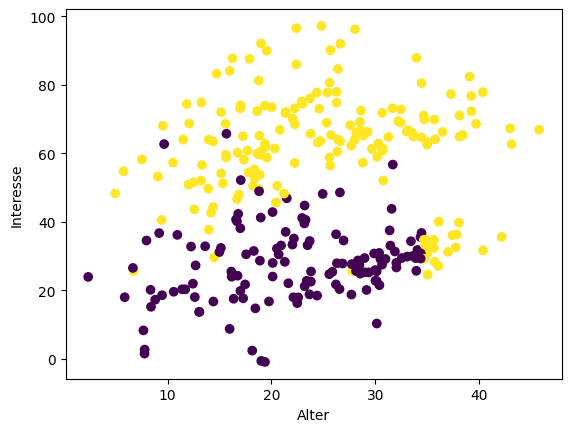

In [3]:
#Plot alle Daten
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(df["age"].values, df["interest"].values, c=df['success'].values)
plt.xlabel("Alter")
plt.ylabel("Interesse")
plt.show()

In [4]:
from sklearn.model_selection import train_test_split

X = df[["age", "interest"]].values
y = df["success"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.25)

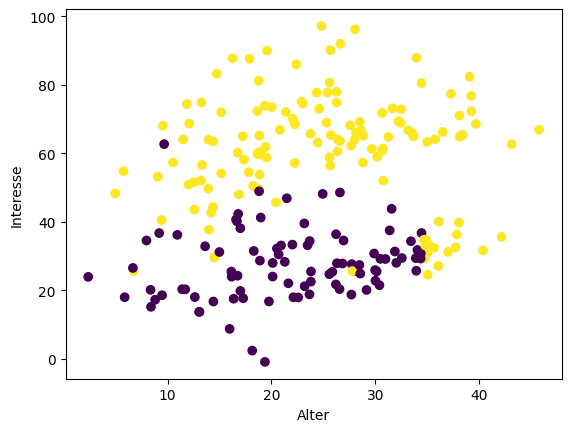

In [5]:
#Plot wie eh und je
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
plt.xlabel("Alter")
plt.ylabel("Interesse")
plt.show()

In [6]:
# Skalierung ist nötig, um auf den Zahlenraum -3 / +3 in X und y skalieren
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
# Einschub:  Was macht so ein Scaler eigentlich?
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

arr = [[0,0], [-100,100], [200,-200]]

#arr = [[0,0], [-100,100], [200,-200]]

#arr = [[0,10], [100,110], [200,210]]

#arr = [[0.1,  500,2,30,0],
#      [0.02,-500,2,-30,0],
#     [-0.1,-100,10,0,0],
#    [-0.02,100,2,0,0],
#  ]

scaler.fit(arr)
scaler.transform(arr)
#kleine und große Zahlen werden auf in den Zahlenbereich von einstelligen Zahlen gebracht 

array([[-0.26726124,  0.26726124],
       [-1.06904497,  1.06904497],
       [ 1.33630621, -1.33630621]])

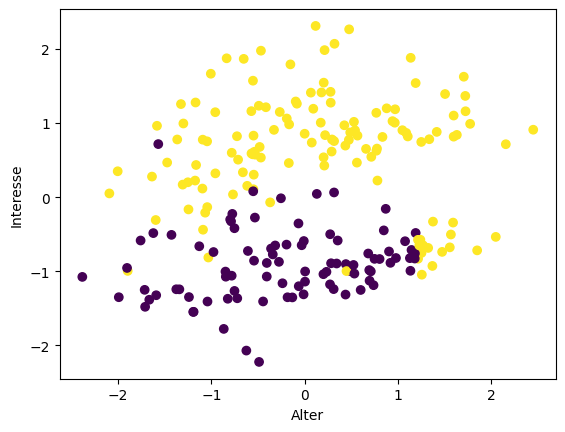

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
plt.xlabel("Alter")
plt.ylabel("Interesse")
plt.show()

In [9]:
#Nun wird versucht mit Logistischer Regression die die Punkte vorherzusagen
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

print("Score: " + str(model.score(X_test, y_test)))

y_predicted = model.predict(X_test)

Score: 0.88


In [10]:
y_predicted

array([1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0.,
       0., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0.,
       1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0.,
       1., 1., 0., 1., 0., 1., 1.])

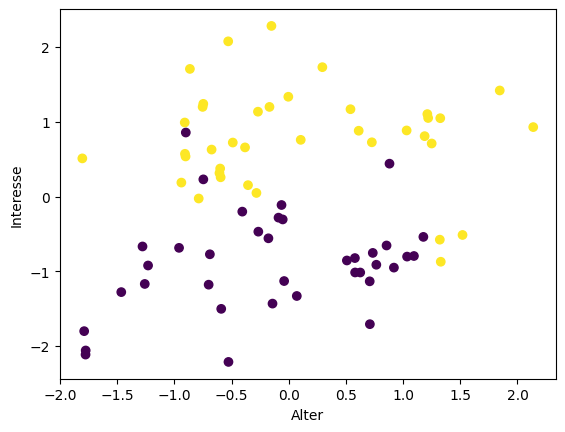

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
plt.xlabel("Alter")
plt.ylabel("Interesse")
plt.show()

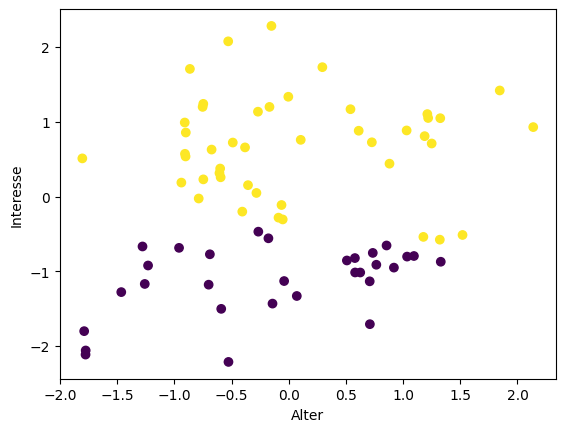

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
#Plotten wir nun, die Vorhersage
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_predicted)
plt.xlabel("Alter")
plt.ylabel("Interesse")
plt.show()

In [13]:
# Wenn man die beiden obigen Plots vergleicht, 
# dann sieht man dass ein paar Punkte falsch visualisiert wurden.

### Verdeutlichung train_test() - Warum kann man mehr als eine Variable zuweisen

In [14]:
def f(x=1):
    y = x*2
    return x,y

a,b = f(5)
print(a)
print(b)

5
10
